In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

<h2> Reading data </h2>

In [4]:
iris = datasets.load_iris()

data = pd.DataFrame({
        'sepal length' : iris.data[:,0], 
        'sepal width': iris.data[:,1],
        'petal length': iris.data[:,2],
        'petal width': iris.data[:,3],
        'species' : iris.target
        })

data.head()

sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
print(iris.data.shape)

(150, 4)


<h2> Applying Random Forest </h2>

trees :  3 Accuracy of the model : 0.9555555555555556
trees :  4 Accuracy of the model : 0.9555555555555556
trees :  5 Accuracy of the model : 0.9555555555555556
trees :  6 Accuracy of the model : 0.9555555555555556
trees :  7 Accuracy of the model : 0.9555555555555556
trees :  8 Accuracy of the model : 0.9555555555555556
trees :  9 Accuracy of the model : 0.9555555555555556
trees :  10 Accuracy of the model : 0.9555555555555556
trees :  11 Accuracy of the model : 0.9555555555555556
trees :  12 Accuracy of the model : 0.9555555555555556
trees :  13 Accuracy of the model : 0.9555555555555556
trees :  14 Accuracy of the model : 0.9555555555555556
trees :  15 Accuracy of the model : 0.9555555555555556
trees :  16 Accuracy of the model : 0.9555555555555556
trees :  17 Accuracy of the model : 0.9555555555555556
trees :  18 Accuracy of the model : 0.9555555555555556
trees :  19 Accuracy of the model : 0.9555555555555556
*****************feature importance*****************
 petal length (cm) 

No handles with labels found to put in legend.


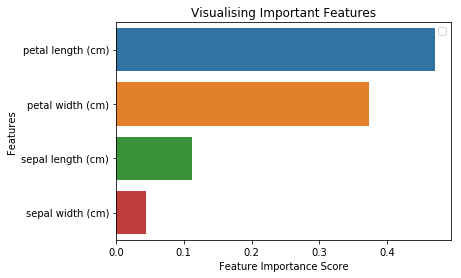

In [23]:
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


from sklearn.ensemble import RandomForestClassifier

#Checking Randorm Forest performance by varying the no of decision trees
for tree_count in range(3,20):
    clf = RandomForestClassifier(n_estimators = tree_count)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    from sklearn import metrics
    print("trees : ", tree_count, "Accuracy of the model :", metrics.accuracy_score(y_test, y_pred))

# Finding feature importance
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print("*****************feature importance*****************\n",feature_imp)

#visualising the feature importance graphically
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualising Important Features")
plt.legend()
plt.show()